In [2]:
#Libraries

#Here all libraries required for current project are running in one go.

import pandas as pd #It provides ready to use high-performance data structures and data analysis tools

import numpy as np # It is used for working with arrays

import seaborn as sns #Visualize Distributions

import matplotlib.pyplot as plt #It is used to create 2D graphs and plots

import warnings
warnings.filterwarnings('ignore') #To ignore warnings

#### - Import data into Python environment.

In [3]:
df = pd.read_csv('Comcast_telecom_complaints_data.csv')

df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-2015,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-2015,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-2015,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-2015,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-2015,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


#### - Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [5]:
df['Date'] = pd.to_datetime(df['Date'])

df['Date_month_year'] = pd.to_datetime(df['Date_month_year'])

df.head(3)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,2015-04-08,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes


In [6]:
df['month_number'] = df['Date_month_year'].dt.month

df['month_name'] = df['Date_month_year'].dt.month_name()

df['Date_dt'] = df['Date_month_year'].dt.day

df.head(3)

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month_number,month_name,Date_dt
0,250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,April,22
1,223441,Payment disappear - service got disconnected,2015-04-08,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,August,4
2,242732,Speed and Service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,April,18


In [7]:
df.rename(columns = {'Ticket #':'Tickets'}, inplace = True)

df.head(3)

,Tickets,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month_number,month_name,Date_dt
0,250635,Comcast Cable Internet Speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,April,22
1,223441,Payment disappear - service got disconnected,2015-04-08,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,August,4
2,242732,Speed and Service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,April,18


In [8]:
#Ticket number has the unique ticket number for each complaint. Hence Total No. of tickets is Total complaints. so taking\
#count of ticket column

df_monthly_nu = pd.DataFrame(df.groupby(['month_number'])['Tickets'].count())

df_monthly_nu

,Tickets
month_number,
1,55
2,59
3,45
4,375
5,317
6,1046
7,49
8,67
9,55


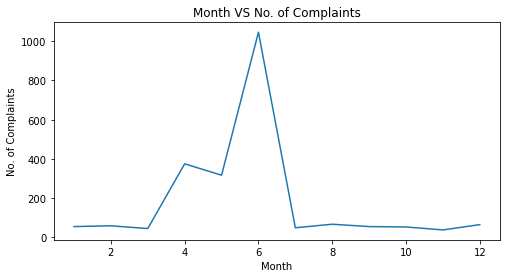

In [9]:
#Monthly trend chart for the number of complaints with month_numbers

fig = plt.figure(figsize = (8,4))
p = sns.lineplot(x = 'month_number', y = 'Tickets', data=df_monthly_nu)
p.set_xlabel('Month')
p.set_ylabel('No. of Complaints')
p.set_title('Month VS No. of Complaints')

plt.show()

#Observations:
#Observed in 6th month highest number of complaints is reported ie 1046.
#Observed in 11th month highest number of complaints is reported ie 38.

In [10]:
df_monthly_na = pd.DataFrame(df.groupby(['month_name'])['Tickets'].count()).reset_index()

df_monthly_na

,month_name,Tickets
0,April,375
1,August,67
2,December,65
3,February,59
4,January,55
5,July,49
6,June,1046
7,March,45
8,May,317
9,November,38


In [11]:
#below code is for making months names in monthly order

sort_order = ['January','February','March','April','May','June','July','August','September','October','November','December']

df_monthly_na.index = pd.CategoricalIndex(df_monthly_na['month_name'], categories=sort_order, ordered = True)

# display(df_monthly_na)

df_monthly_na = df_monthly_na.sort_index().reset_index(drop = True)

display(df_monthly_na)

,month_name,Tickets
0,January,55
1,February,59
2,March,45
3,April,375
4,May,317
5,June,1046
6,July,49
7,August,67
8,September,55
9,October,53


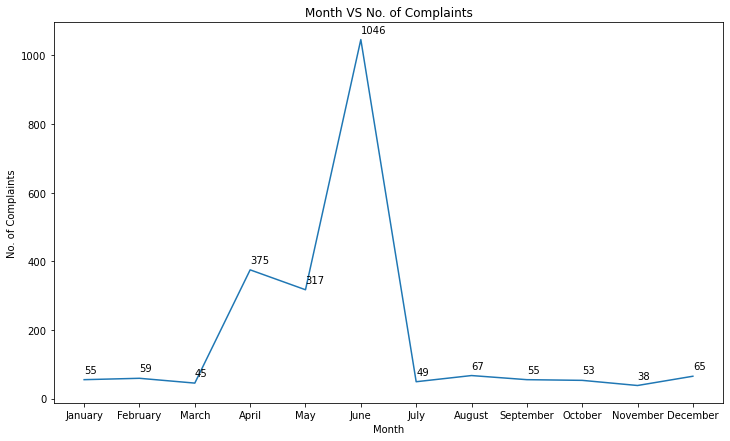

In [12]:
#Monthly trend chart for the number of complaints with month_name

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i] + 20, y[i], ha = 'left')

fig = plt.figure(figsize = (12,7))
p = sns.lineplot(x = 'month_name', y = 'Tickets', data = df_monthly_na)
p.set_xlabel('Month')
p.set_ylabel('No. of Complaints')
p.set_title('Month VS No. of Complaints')

addlabels(df_monthly_na['month_name'],df_monthly_na['Tickets'])

#Observations:
#Observed in June month highest number of complaints is reported ie 1046.
#Observed in November month lowest number of complaints is reported ie 38.

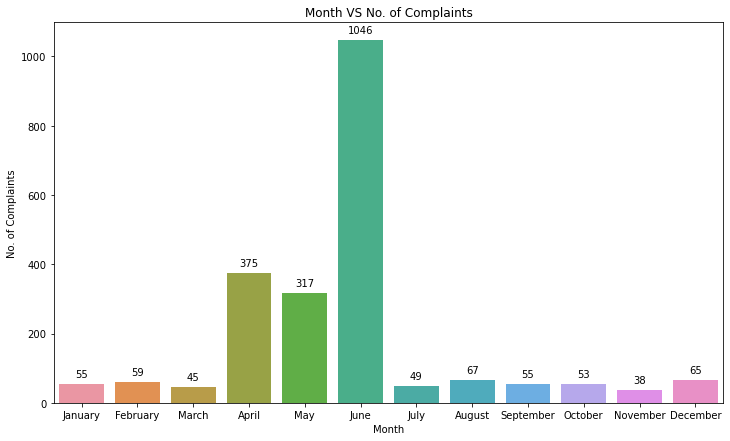

In [13]:
#Bar Plot

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i] + 20, y[i], ha = 'center')

fig = plt.figure(figsize = (12,7))

p = sns.barplot(x = 'month_name', y = 'Tickets', data = df_monthly_na)
p.set_xlabel('Month')
p.set_ylabel('No. of Complaints')
p.set_title('Month VS No. of Complaints')

addlabels(df_monthly_na['month_name'],df_monthly_na['Tickets'])


In [14]:
len(df.Tickets.unique())

# len(df['Customer Complaint'].unique())  #Customer Complaint will not represent the number of complaints

2224

In [15]:
df_daily = df.groupby(['month_name','Date_dt'])['Tickets'].count().to_frame()

df_daily.head()

Tickets
month_name Date_dt         
April      4             12
           5             12
           6             12
           13            24
           14            23

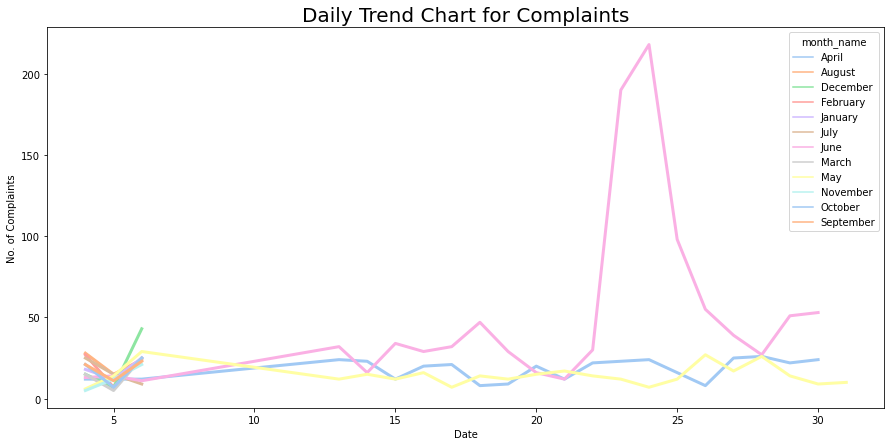

In [16]:
#Daily trend chart for the number of complaints

fig = plt.figure(figsize = (15,7))

p = sns.lineplot(x = 'Date_dt', y = 'Tickets', data = df_daily, lw = 3, palette = 'pastel', hue = 'month_name')
p.set_xlabel('Date')
p.set_ylabel('No. of Complaints')
p.set_title('Daily Trend Chart for Complaints', fontsize = 20)
plt.show()

#### - Provide a table with the frequency of complaint types.

        Which complaint types are maximum i.e., around internet, network issues, or across any other domains.

In [17]:
df['Customer Complaint'] = df['Customer Complaint'].str.lower()

df.head(3)    

,Tickets,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month_number,month_name,Date_dt
0,250635,comcast cable internet speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,April,22
1,223441,payment disappear - service got disconnected,2015-04-08,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,August,4
2,242732,speed and service,2015-04-18,2015-04-18,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,4,April,18


In [18]:
df['list_cc'] = df['Customer Complaint'].apply(lambda x: x.split(' '))

df.head(1)


,Tickets,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month_number,month_name,Date_dt,list_cc
0,250635,comcast cable internet speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,April,22,"[comcast, cable, internet, speeds]"


In [19]:
df['list_cc'].value_counts().head()

[comcast]                102
[comcast, data, cap]      30
[comcast, internet]       29
[comcast, data, caps]     21
[comcast, billing]        18
Name: list_cc, dtype: int64

In [20]:
issue_category = {'internet':[0],'network':[0],'service':[0],'billing':[0],'data cap':[0],'fee':[0]}


a, b, c, d, e, f= 0, 0, 0, 0, 0, 0


for i in df['list_cc']:
    for n in i:
        if n == 'internet':
            a += 1
            issue_category['internet'][0] = a
        elif n == 'network':
            b += 1
            issue_category['network'][0] = b
        elif n == 'service':
            c += 1
            issue_category['service'][0] = c
        elif n == 'billing':
            d += 1
            issue_category['billing'][0] = d
        elif ((n == 'cap') | (n == 'caps')):
            e += 1
            issue_category['data cap'][0] = e
        elif((n == 'fee') | (n == 'fees')):
            f +=1
            issue_category['fee'][0] = f


            
issue_category = pd.DataFrame.from_dict(issue_category)

issue_category

#Here I assume 6 domain Categories to describe the complaint types. Below is the Categories:
#1. Internet related
#2. network related
#3. service related (here service means it could be customer service or internet service, ultimately service related)
#4. Billing related
#5. Data Cap related
#6. fees related

#It could be more categories to describe the complaints types. But here i am assuming only 6 categories.

#Observations:
#observed 508 complaints related to INTERNET
#observed 2 complaints related to NETWORK
#observed 411 complaints related to SERVICE
#observed 273 complaints related to BILLING
#observed 179 complaints related to DATA CAP
#observed 42 complaints related to FEES

#Conclusion:
#In the above complaint types, i observed Internet related complaint types is maximum with 508 complaints

,internet,network,service,billing,data cap,fee
0,508,2,411,273,179,42


#### - Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [21]:
df.Status.unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [22]:
df['Category'] = np.where(((df['Status'] == 'Open') | (df['Status'] == 'Pending')), 'Open','Closed')

df.head(2)

,Tickets,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month_number,month_name,Date_dt,list_cc,Category
0,250635,comcast cable internet speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,April,22,"[comcast, cable, internet, speeds]",Closed
1,223441,payment disappear - service got disconnected,2015-04-08,2015-08-04,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,8,August,4,"[payment, disappear, -, service, got, disconne...",Closed


In [23]:
df.Category.unique()

array(['Closed', 'Open'], dtype=object)

In [24]:
df['Category'].value_counts()

#Observations:
#1. Observed there is 1707 closed complaints
#2. Observed there is 517 open camplaints

Closed    1707
Open       517
Name: Category, dtype: int64

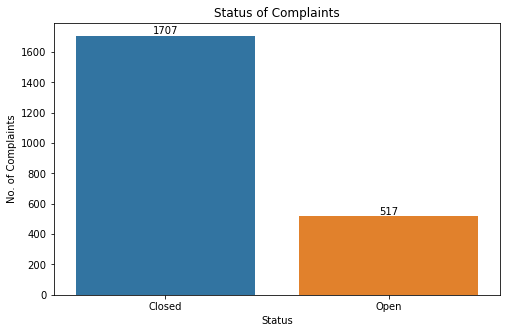

In [25]:
#Below is Just to visualize the closed and open status


fig = plt.figure(figsize = (8,5))
p = sns.countplot(x = 'Category', data = df)
p.set_xlabel('Status')
p.set_ylabel('No. of Complaints')
p.set_title('Status of Complaints')

for container in p.containers:
    p.bar_label(container)


#### - Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. Provide insights on:

    Which state has the maximum complaints
    Which state has the highest percentage of unresolved complaints

In [26]:
len(df.State.unique())  #43 States

43

In [27]:
df.State.unique()

#Here observed that District of Columbia is appeared as twice with two variations which is duplicate.
#1. District Of Columbia
#2. District of Columbia
#In the 'Of' word 'O' is the capital letter in one variation. To perform the state wise insights need to correct this error

array(['Maryland', 'Georgia', 'Michigan', 'California', 'New Mexico',
       'Indiana', 'Virginia', 'Illinois', 'Pennsylvania', 'Massachusetts',
       'Oregon', 'Texas', 'New Hampshire', 'Minnesota', 'Tennessee',
       'Colorado', 'Florida', 'Alabama', 'Washington', 'New York',
       'New Jersey', 'Maine', 'Missouri', 'West Virginia', 'Montana',
       'Mississippi', 'Connecticut', 'Vermont', 'Kentucky',
       'South Carolina', 'Ohio', 'Utah', 'Delaware', 'Arkansas', 'Nevada',
       'Louisiana', 'Kansas', 'Arizona', 'North Carolina', 'Rhode Island',
       'District Of Columbia', 'District of Columbia', 'Iowa'],
      dtype=object)

In [28]:
df.replace(to_replace="District Of Columbia",
           value="District of Columbia", inplace = True)


In [29]:
print(df.State.unique())

len(df.State.unique()) #42 States

#Here now the State names has no duplicates

['Maryland' 'Georgia' 'Michigan' 'California' 'New Mexico' 'Indiana'
 'Virginia' 'Illinois' 'Pennsylvania' 'Massachusetts' 'Oregon' 'Texas'
 'New Hampshire' 'Minnesota' 'Tennessee' 'Colorado' 'Florida' 'Alabama'
 'Washington' 'New York' 'New Jersey' 'Maine' 'Missouri' 'West Virginia'
 'Montana' 'Mississippi' 'Connecticut' 'Vermont' 'Kentucky'
 'South Carolina' 'Ohio' 'Utah' 'Delaware' 'Arkansas' 'Nevada' 'Louisiana'
 'Kansas' 'Arizona' 'North Carolina' 'Rhode Island' 'District of Columbia'
 'Iowa']


42

In [30]:
df_State = df.groupby(['State','Category'])['Category'].count().to_frame().\
            rename(columns = {'Category':'Category_Count'}).reset_index()

df_State.head() 


,State,Category,Category_Count
0,Alabama,Closed,17
1,Alabama,Open,9
2,Arizona,Closed,14
3,Arizona,Open,6
4,Arkansas,Closed,6


In [31]:
df_State = pd.pivot_table(data = df_State, index = ['State'], columns = ['Category'], values = 'Category_Count').reset_index()

df_State.head()

#I observed some Nan values in the data, will make nan values is 0

Category,State,Closed,Open
0,Alabama,17.0,9.0
1,Arizona,14.0,6.0
2,Arkansas,6.0,NaN
3,California,159.0,61.0
4,Colorado,58.0,22.0


In [32]:
df_State.dtypes

df_State = df_State.fillna(0)


df_State['Closed'] = df_State['Closed'].astype(int)
df_State['Open'] = df_State['Open'].astype(int)

df_State.head()


Category,State,Closed,Open
0,Alabama,17,9
1,Arizona,14,6
2,Arkansas,6,0
3,California,159,61
4,Colorado,58,22


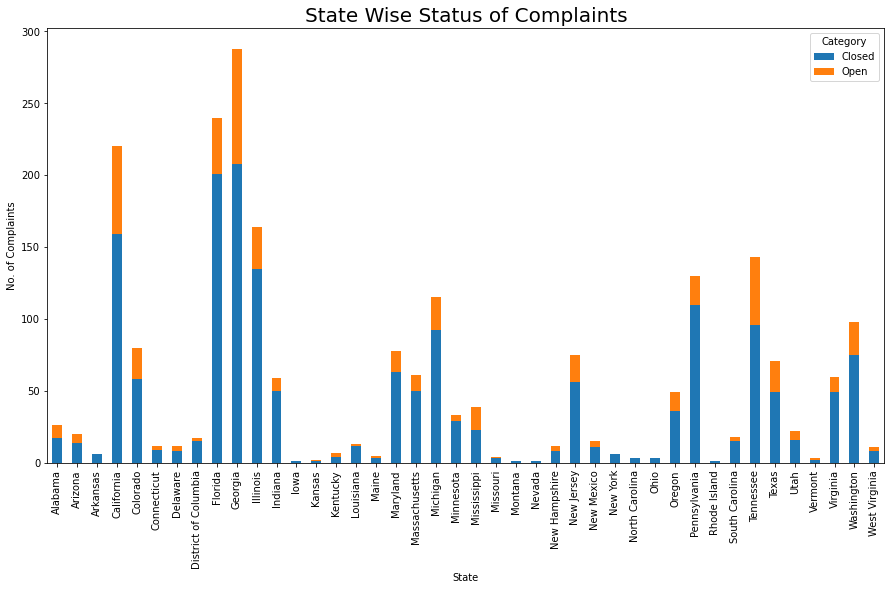

In [33]:
#stacked bar chart for state wise status of complaints


p = df_State.plot.bar(x = 'State', stacked = True, figsize = (15,8))
p.set_title('State Wise Status of Complaints', fontsize = 20)
p.set_ylabel('No. of Complaints')
plt.show()


In [34]:
df_State['Total_Complaints'] = df_State['Closed'] + df_State['Open']

df_State.sort_values('Total_Complaints', ascending = True).head()
df_State.sort_values('Open', ascending = True).head(9)
df_State.sort_values('Closed', ascending = True).head(10)

#Observations from the above chart:
#1. Observed Georgia state has highest number of complaints with 288.
#2. Observed Nevada, lowa, Montana and Rhoda Island states has lowest number of complaints with 1.
#3. Observed Georgia State has highest number of open complaints with 80 and New York, Nevada, Arkansas,\
# Rhode Island, Ohio, Iowa, North Carolina and Montana has no open complaints
#4. Observed Georgia State has highest number of Closed complaints with 208 and Nevada, Kansas, Iowa, Montana and \
#Rhode Island has lowest number of closed complaints with 1.

Category,State,Closed,Open,Total_Complaints
24,Nevada,1,0,1
13,Kansas,1,1,2
12,Iowa,1,0,1
23,Montana,1,0,1
33,Rhode Island,1,0,1
38,Vermont,2,1,3
29,North Carolina,3,0,3
16,Maine,3,2,5
30,Ohio,3,0,3
22,Missouri,3,1,4


In [35]:
#maximum complaints

df_State.sort_values('Total_Complaints', ascending = False).head(5)

#Georgia State has maximum complaints with 288.

Category,State,Closed,Open,Total_Complaints
9,Georgia,208,80,288
8,Florida,201,39,240
3,California,159,61,220
10,Illinois,135,29,164
35,Tennessee,96,47,143


In [36]:
df_State['Per_Closed_State'] = ((df_State['Closed']/df_State['Total_Complaints'])*100).round(2)

df_State['Per_Open_State'] = ((df_State['Open']/df_State['Total_Complaints'])*100).round(2)


df_State['Per_Closed_Overall'] = ((df_State['Closed']/sum(df_State['Total_Complaints']))*100).round(2)

df_State['Per_Open_Overall'] = ((df_State['Open']/sum(df_State['Total_Complaints']))*100).round(2)


df_State['Per_Closed'] = ((df_State['Closed']/sum(df_State['Closed']))*100).round(2)

df_State['Per_Open'] = ((df_State['Open']/sum(df_State['Open']))*100).round(2)

df_State.head()

#Column definition:
#Per_Closed_State = Percentage of resolved complaints with respect to State
#Per_Open_State = Percentage of unresolved complaints with respect to State

#Per_Closed_Overall = Percentage of resolved complaints overall
#Per_Open_Overall = Percentage of unresolved complaints overall

#Per_Closed = Percentage of resolved complaints in resloved status
#Per_Open = Percentage of unresolved complaints in unresolved status

Category,State,Closed,Open,Total_Complaints,Per_Closed_State,Per_Open_State,Per_Closed_Overall,Per_Open_Overall,Per_Closed,Per_Open
0,Alabama,17,9,26,65.38,34.62,0.76,0.40,1.00,1.74
1,Arizona,14,6,20,70.00,30.00,0.63,0.27,0.82,1.16
2,Arkansas,6,0,6,100.00,0.00,0.27,0.00,0.35,0.00
3,California,159,61,220,72.27,27.73,7.15,2.74,9.31,11.80
4,Colorado,58,22,80,72.50,27.50,2.61,0.99,3.40,4.26


In [37]:
#Which state has the highest percentage of unresolved complaints

#Here unresolved complaints is open complaints

df_State.sort_values('Per_Open_State', ascending = False).head()
df_State.sort_values('Per_Open_Overall', ascending = False).head()
df_State.sort_values('Per_Open', ascending = False).head()

#Observations:
#With respect to State, Kansas State has highest percentage of unresolved complaints with 50%.
#In overall, Georgia State has highest percentage of unresolved complaints with 3.6%.
#In unresolved complaints, Georgia State has highest percentage of unresolved complaints with 15.47%

Category,State,Closed,Open,Total_Complaints,Per_Closed_State,Per_Open_State,Per_Closed_Overall,Per_Open_Overall,Per_Closed,Per_Open
9,Georgia,208,80,288,72.22,27.78,9.35,3.60,12.19,15.47
3,California,159,61,220,72.27,27.73,7.15,2.74,9.31,11.80
35,Tennessee,96,47,143,67.13,32.87,4.32,2.11,5.62,9.09
8,Florida,201,39,240,83.75,16.25,9.04,1.75,11.78,7.54
10,Illinois,135,29,164,82.32,17.68,6.07,1.30,7.91,5.61


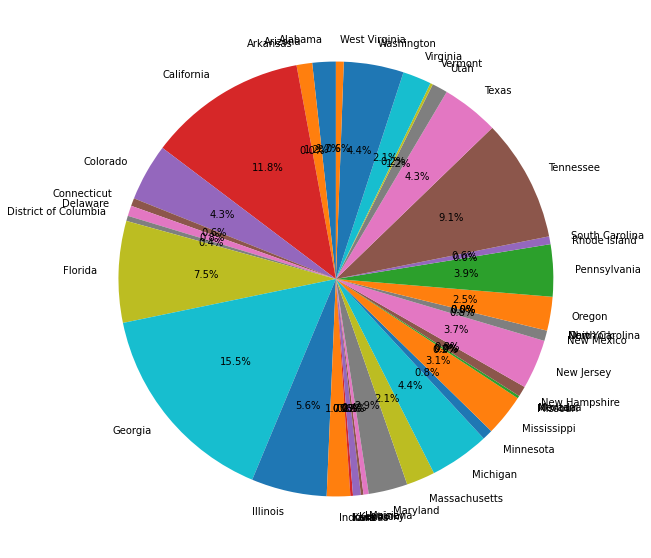

In [38]:
#Pie Chart for State Wise percentage of Open Complaints

fig = plt.figure(figsize =(12, 10))
plt.pie(df_State.Open, labels = df_State.State,\
           autopct='%1.1f%%', startangle=90)
plt.show()

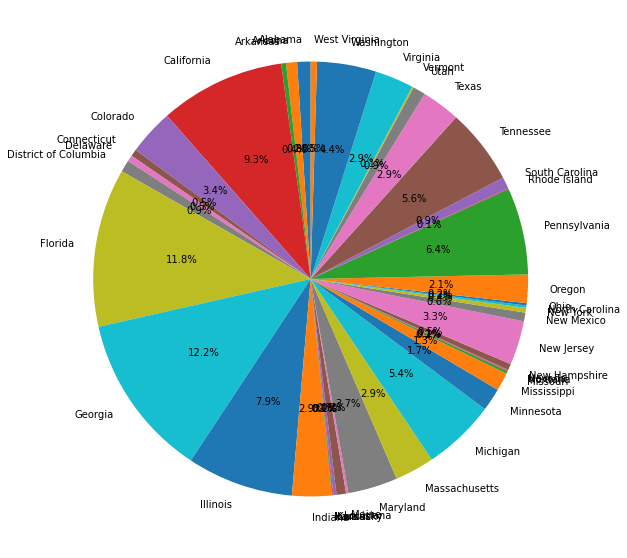

In [39]:
#Pie Chart for State Wise percentage of Closed Complaints

fig = plt.figure(figsize =(12, 10))
plt.pie(df_State.Closed, labels = df_State.State,\
           autopct='%1.1f%%', startangle=90)
plt.show()

#### - Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [40]:
df.columns

Index(['Tickets', 'Customer Complaint', 'Date', 'Date_month_year', 'Time',
       'Received Via', 'City', 'State', 'Zip code', 'Status',
       'Filing on Behalf of Someone', 'month_number', 'month_name', 'Date_dt',
       'list_cc', 'Category'],
      dtype='object')

In [41]:
df.head(1)

,Tickets,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,month_number,month_name,Date_dt,list_cc,Category
0,250635,comcast cable internet speeds,2015-04-22,2015-04-22,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,4,April,22,"[comcast, cable, internet, speeds]",Closed


In [42]:
df_per_com = df.groupby(['Received Via','Category'])['Tickets'].count().to_frame()

df_per_com.head()

Tickets
Received Via       Category         
Customer Care Call Closed        864
                   Open          255
Internet           Closed        843
                   Open          262

In [43]:
df_per_com = pd.pivot_table(data = df_per_com, index = ['Received Via'], columns = ['Category'], values = 'Tickets')\
            .reset_index()

df_per_com

Category,Received Via,Closed,Open
0,Customer Care Call,864,255
1,Internet,843,262


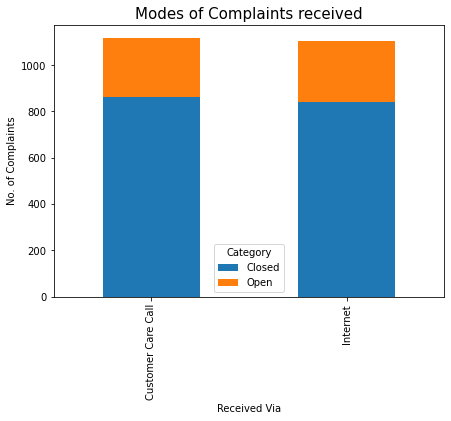

In [44]:
#stacked bar chart for Mode of complaints received


p = df_per_com.plot.bar(x = 'Received Via', stacked = True, figsize = (7,5))
p.set_title('Modes of Complaints received', fontsize = 15)
p.set_ylabel('No. of Complaints')
plt.show()

In [45]:
df_per_com['Total_Complaints'] = df_per_com['Closed'] + df_per_com['Open']

df_per_com['Per_Closed'] = ((df_per_com['Closed']/df_per_com['Total_Complaints'])*100).round(2)

df_per_com['Per_Open'] = ((df_per_com['Open']/df_per_com['Total_Complaints'])*100).round(2)

df_per_com

#Columns definitions:
#Total_Complaints = sum of Closed complaints and Open complaints
#Per_Closed = Percentage of resolved complaints wrt to Received Via
#Per_Open = Percentage of unresolved complaints wrt to Received Via


Category,Received Via,Closed,Open,Total_Complaints,Per_Closed,Per_Open
0,Customer Care Call,864,255,1119,77.21,22.79
1,Internet,843,262,1105,76.29,23.71


In [46]:
df_per_com

#Observations:
#Through the Customer Care call received 1119 complaints in which 864 are closed and 255 are in open.\
#77.21% is the resolved complaints and 22.79% is the unresolved complaints which received through Customer Care call.

#Through the Internet received 1105 complaints in which 843 are closed and 262 are in open.\
#76.29% is the resolved complaints and 23.71 is the unresolved complaints which received through Internet.

Category,Received Via,Closed,Open,Total_Complaints,Per_Closed,Per_Open
0,Customer Care Call,864,255,1119,77.21,22.79
1,Internet,843,262,1105,76.29,23.71


In [47]:
#Provide the percentage of complaints resolved till date, which received through the Internet and customer care calls.

(sum(df_per_com['Closed'])/(sum(df_per_com['Total_Complaints'])))*100

#Observation:
#76.7 % of complaints is resolved till date, which received through the Internet and customer care calls.

76.75359712230215

In [48]:
#percentage of complaints unresolved till date, which received through the Internet and customer care calls.

(sum(df_per_com['Open'])/(sum(df_per_com['Total_Complaints'])))*100

#Observation:
#23.2 % of complaints is unresolved till date, which received through the Internet and customer care calls.

23.246402877697843

In [49]:
df_per_com['Per_Closed_Cl'] = ((df_per_com['Closed']/sum(df_per_com['Closed']))*100).round(2)

df_per_com['Per_Open_Op'] = ((df_per_com['Open']/sum(df_per_com['Open']))*100).round(2)

df_per_com['Per_Closed_Overall'] = ((df_per_com['Closed']/sum(df_per_com['Total_Complaints']))*100).round(2)

df_per_com['Per_Open_Overall'] = ((df_per_com['Open']/sum(df_per_com['Total_Complaints']))*100).round(2)


df_per_com

#Columns definitions:
#Per_Closed_Cl = Percentage of resolved complaints in resolved status
#Per_Open_Op = Percentage of unresolved complaints in unresolved status
#Per_Closed_Overall =  Percentage of resolved complaints in overall
#Per_Open_Overall = Percentage of unresolved complaints in overall

#Observations:
#In resolved complaints, 50.62% of resolved complaints in Customer Care Calls and \
#49.38% of resolved complaints in Internet.

#In unresolved complaints, 49.32% of unresolved complaints in Customer Care Calls and \
#50.68% of unresolved complaints in Internet.

#In overall, 38.85% of resolved complaints in Customer Care Calls and \
#37.90% of resloved complaints in Internet.

#In overall, 11.47% of unresolved complaints in Customer Care Calls and \
#11.78% of unresolved complaints in Internet.

Category,Received Via,Closed,Open,Total_Complaints,Per_Closed,Per_Open,Per_Closed_Cl,Per_Open_Op,Per_Closed_Overall,Per_Open_Overall
0,Customer Care Call,864,255,1119,77.21,22.79,50.62,49.32,38.85,11.47
1,Internet,843,262,1105,76.29,23.71,49.38,50.68,37.90,11.78


# END